In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25989 entries, 44 to 26032
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    25989 non-null  int64  
 1   value   25989 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 406.2 KB


In [8]:
df.head()

,Date,value
44,19470305,306.10
45,19470306,306.00
46,19470307,321.40
47,19470308,345.60
48,19470309,335.75


<Axes: >

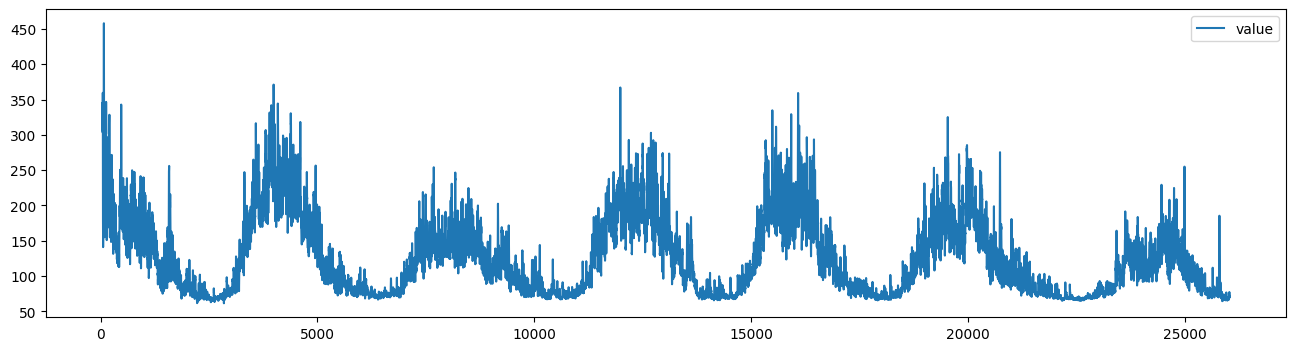

In [9]:
df['value'].plot(figsize=(16,4),legend=True)

In [10]:
n = 300

In [11]:
X = [df['value'].values[i:i+n] for i in range(len(df)-n)]

In [12]:
y = [df['value'].values[i+n] for i in range(len(df)-n)]

In [13]:
len(X), len(y)

(25689, 25689)

In [14]:
X[0].shape, y[0].shape

((300,), ())

In [15]:
# X_test, y_test = X[-n:], y[-n:]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X[:-n]), np.array(y[:-n]), test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((19991, 500), (19991,), (4998, 500), (4998,))

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Model 1

In [ ]:
model1 = Sequential()
# model1.add(Dense(128, activation='relu', input_dim=X_train.shape[-1]))
model1.add(Dense(64, activation='relu', input_dim=X_train.shape[-1]))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                32064     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 34,281
Trainable params: 34,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    verbose=1)

Epoch 1/100
625/625 [==============================] - 2s 2ms/step - loss: 845.1316 - mae: 17.1317 - val_loss: 329.7048 - val_mae: 12.0599
Epoch 2/100
625/625 [==============================] - 1s 2ms/step - loss: 300.0689 - mae: 11.9793 - val_loss: 204.1865 - val_mae: 9.4161
Epoch 3/100
625/625 [==============================] - 1s 2ms/step - loss: 195.7670 - mae: 9.6431 - val_loss: 161.0299 - val_mae: 9.2866
Epoch 4/100
625/625 [==============================] - 1s 2ms/step - loss: 169.4048 - mae: 9.0940 - val_loss: 153.6822 - val_mae: 8.5902
Epoch 5/100
625/625 [==============================] - 1s 1ms/step - loss: 141.7270 - mae: 8.3131 - val_loss: 101.1653 - val_mae: 6.6609
Epoch 6/100
625/625 [==============================] - 1s 2ms/step - loss: 129.9501 - mae: 8.0141 - val_loss: 87.8342 - val_mae: 6.3268
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - loss: 116.4210 - mae: 7.5495 - val_loss: 94.0088 - val_mae: 6.5366
Epoch 8/100
625/625 [===================

In [22]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

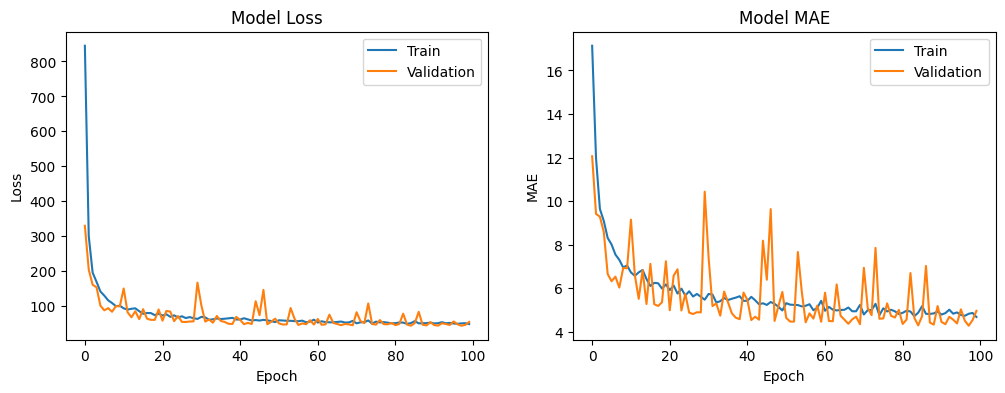

In [ ]:
plot_result(history1)

In [ ]:
def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

In [ ]:
pred1 = make_pred(n, model1)

1/1 [==============================] - 0s 15ms/step


In [ ]:
pred1

array([71.14247894, 71.63169098, 70.70392609, 70.40857697, 69.51299286,
       68.01534271, 67.28456116, 66.11271667, 64.92946625, 64.59633636,
       63.67305756, 63.59275818, 62.91977692, 62.16946411, 61.11950684,
       59.85160828, 58.90063477, 58.62250519, 57.63665009, 57.10627365,
       56.85760117, 57.77967834, 57.50274658, 58.08985519, 58.15806198,
       57.89266968, 57.49793243, 57.69005966, 57.65128326, 57.95042038,
       57.85743713, 58.0823555 , 59.05245209, 58.98274994, 59.17449951,
       59.22771454, 59.72822571, 59.25222778, 58.58216858, 58.06497192,
       57.57345963, 57.86669922, 57.82421112, 57.75954056, 58.32526016,
       58.16316986, 57.65943909, 56.82678223, 56.46865082, 55.48460388,
       55.33706284, 55.12310791, 54.82761383, 54.65085602, 54.73873901,
       53.96979904, 53.41059113, 52.10879517, 51.70157623, 51.5586319 ,
       51.1713562 , 51.27147293, 51.69619751, 52.0365448 , 52.5870018 ,
       52.4475441 , 52.4310379 , 53.10558319, 53.93252945, 53.88

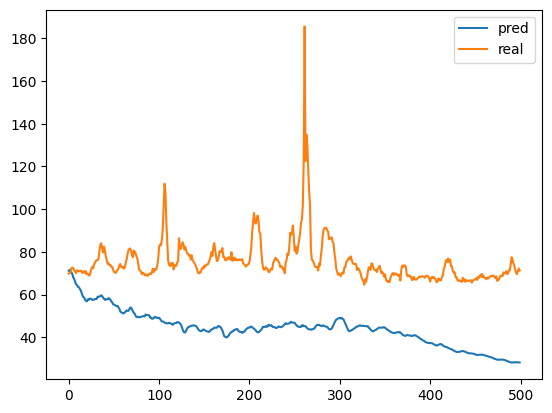

In [ ]:
plt.plot(pred1, label='pred')
plt.plot(y_test, label='real')
plt.legend()

In [ ]:
pred1_2 = make_pred(30, model1)

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


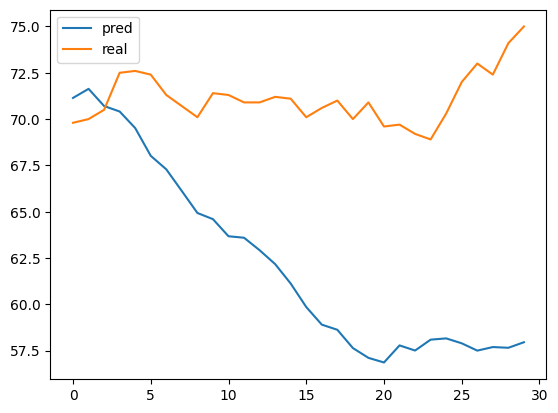

In [ ]:
plt.plot(pred1_2, label='pred')
plt.plot(y_test[:30], label='real')
plt.legend()

# Model 2

In [ ]:
from keras.layers import BatchNormalization, Dropout


In [ ]:
model2 = Sequential()
# model2.add(Dense(128, activation='relu', input_dim=X_train.shape[-1]))
model2.add(Dense(64, activation='relu', input_dim=X_train.shape[-1]))
model2.add(BatchNormalization())
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1))

model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

model2.summary()

Model: "sequential_2"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                32064     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 4)                 132       
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
          

In [ ]:
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    verbose=1)

Epoch 1/100
625/625 [==============================] - 2s 2ms/step - loss: 8322.1445 - mae: 79.2546 - val_loss: 1855.5654 - val_mae: 39.1501
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 619.6396 - mae: 18.6235 - val_loss: 268.1454 - val_mae: 12.5782
Epoch 3/100
625/625 [==============================] - 1s 2ms/step - loss: 253.0892 - mae: 11.6338 - val_loss: 134.2559 - val_mae: 9.3207
Epoch 4/100
625/625 [==============================] - 1s 2ms/step - loss: 161.8981 - mae: 8.9131 - val_loss: 246.5162 - val_mae: 12.8320
Epoch 5/100
625/625 [==============================] - 1s 2ms/step - loss: 161.1815 - mae: 8.9786 - val_loss: 675.5240 - val_mae: 22.8422
Epoch 6/100
625/625 [==============================] - 1s 2ms/step - loss: 147.6503 - mae: 8.5112 - val_loss: 813.2919 - val_mae: 25.9983
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - loss: 139.7717 - mae: 8.3494 - val_loss: 106.5752 - val_mae: 7.1657
Epoch 8/100
625/625 [==========

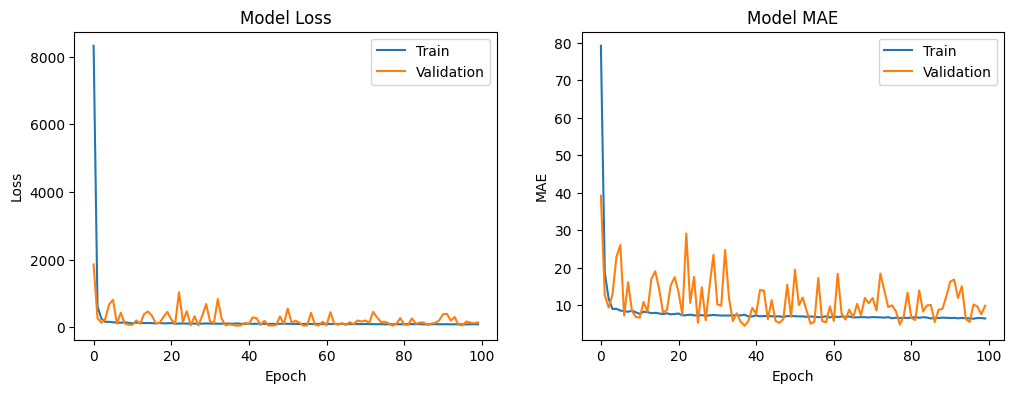

In [ ]:
plot_result(history2)

In [ ]:
pred2_1 = make_pred(365, model2)

1/1 [==============================] - 0s 24ms/step


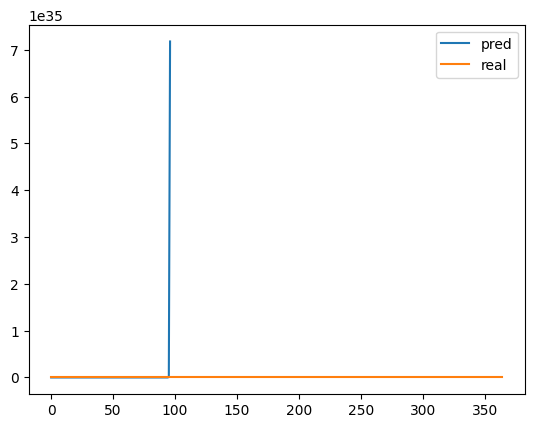

In [ ]:
plt.plot(pred2_1, label='pred')
plt.plot(y_test[:365], label='real')
plt.legend()

In [ ]:
model2.save('C:/Users/User/Desktop/ai project/model/DNN_model_BatchNorm.keras')

In [ ]:
recon_model = keras.models.load_model('C:/Users/User/Desktop/ai project/model/DNN_model_BatchNorm.keras')

# Model 3

In [19]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=X_train.shape[-1]))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1))

model3.compile(loss='mse', optimizer='adam', metrics=['mae'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 49169 (192.07 KB)
Trainable params: 49169 

In [20]:
history3 = model3.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    verbose=1)

Epoch 1/100
508/508 [==============================] - 7s 8ms/step - loss: 18213.3555 - mae: 124.4473 - val_loss: 18140.5938 - val_mae: 123.8597
Epoch 2/100
508/508 [==============================] - 2s 4ms/step - loss: 18085.6406 - mae: 123.9334 - val_loss: 18015.7148 - val_mae: 123.3545
Epoch 3/100
508/508 [==============================] - 2s 3ms/step - loss: 17960.7559 - mae: 123.4283 - val_loss: 17891.5625 - val_mae: 122.8502
Epoch 4/100
508/508 [==============================] - 2s 5ms/step - loss: 17836.5645 - mae: 122.9245 - val_loss: 17768.0215 - val_mae: 122.3464
Epoch 5/100
508/508 [==============================] - 2s 5ms/step - loss: 17712.9355 - mae: 122.4214 - val_loss: 17644.9492 - val_mae: 121.8424
Epoch 6/100
508/508 [==============================] - 2s 5ms/step - loss: 17589.9004 - mae: 121.9175 - val_loss: 17522.5566 - val_mae: 121.3391
Epoch 7/100
508/508 [==============================] - 2s 3ms/step - loss: 17467.4707 - mae: 121.4144 - val_loss: 17400.7227 - val

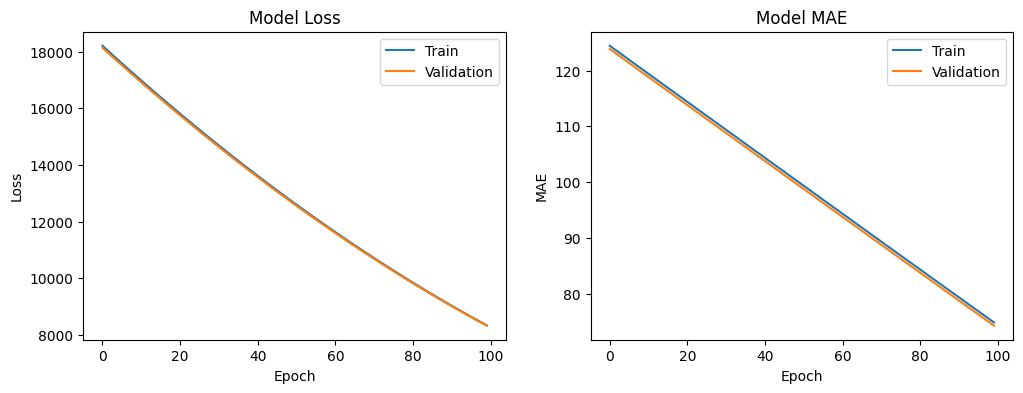

In [23]:
plot_result(history3)

In [ ]:
t = [i[-1] for i in X_train]

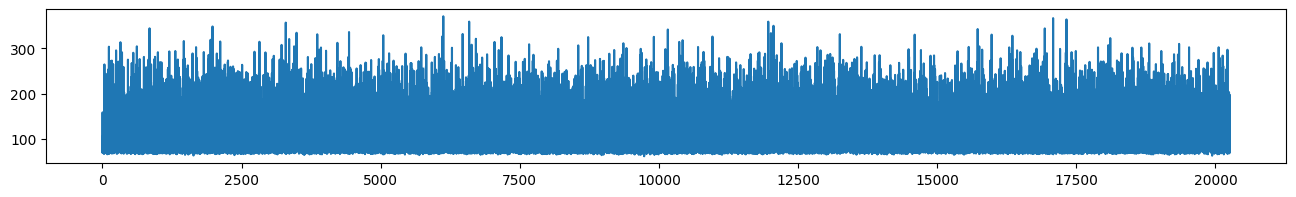

In [ ]:
plt.figure(figsize=(16,2))
plt.plot(t)

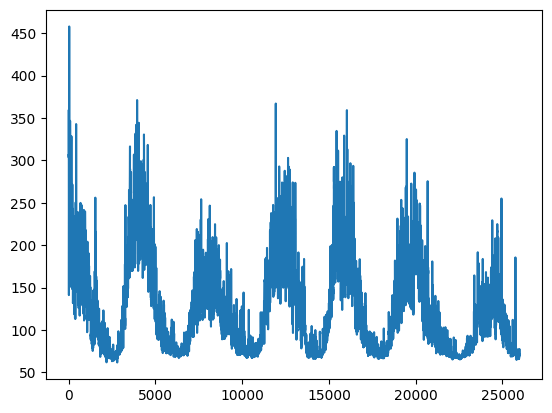

In [ ]:
plt.plot(df['value'].values)

In [ ]:
X_train

array([[ 79.9 ,  80.2 ,  80.4 , ...,  72.5 ,  71.5 ,  70.5 ],
       [ 73.3 ,  72.4 ,  71.7 , ...,  87.9 ,  84.8 ,  87.6 ],
       [133.9 , 133.  , 139.  , ..., 154.1 , 157.7 , 158.8 ],
       ...,
       [120.6 , 127.7 , 136.1 , ..., 178.7 , 179.45, 180.2 ],
       [141.2 , 146.1 , 148.1 , ..., 229.4 , 203.  , 197.7 ],
       [140.4 , 139.2 , 135.8 , ..., 135.9 , 128.3 , 118.3 ]])